# 다변수 연속확률변수의 결합/조건부확률

연속확률분포에서는 이산확률분포와 같이 아톰(atom) 이벤트를 이용한 확률의 정의가 불가능하므로 단변수 연속확률변수처럼 누적확률분포함수를 먼저 정의한 후 이를 미분하여 확률밀도함수를 정의하는 방법을 사용한다.

## 결합 누적확률분포함수

두 확률 변수 $X$, $Y$에 대한 결합 누적확률분포함수 $F_{XY}(x, y) $는 다음과 같이 정의한다.

$$ F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(\{X < x, Y < y\}) $$

결합 누적확률분포함수 $F_{XY}(x, y) $는 다음과 같은 특성을 가진다.

$$ F_{XY}(\infty, \infty)=1 $$

$$ F_{XY}(-\infty, y)=F_{XY}(x,-\infty)=0 $$

만약 구간의 끝을 나타내는 두 독립 변수 $x$, $y$중 하나가 무한대 값을 가지는 경우에는 해당 변수의 값은 어떤 값을 가져도 상관없으므로 남은 하나의 변수에 대한 누적확률분포함수로 줄어든다. 이를 **주변 누적확률분포(marginal cumulative probability distribution)**이라고 한다.

$$ F_X(x)=F_{XY}(x, \infty) $$

$$ F_Y(y)=F_{XY}(\infty, y) $$

## 결합 확률밀도함수

단변수 확률변수의 경우처럼  결합 누적확률분포함수를 미분하여 결합 확률밀도함수를 정의할 수 있다. 다만 이 경우에는 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 한다.

$$ f_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y} $$

결합 확률 밀도 함수를 특정 구간에 대해 적분하면 해당 구간에 대한 확률이 된다.

$$  \int_{x_1}^{x_2} \int_{y_1}^{y_2} f_{XY}(x,y)dxdy = P\big(\{ x_1 \leq X \leq x_2, \; y_1 \leq Y \leq y_2 \}\big)  $$

따라서 결합 확률 밀도 함수를 모든 변수에 대해 $-\infty$에서 $\infty$ 까지 적분하면 값이 1이 된다.

$$  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{XY}(x,y)dxdy=1 $$

연속 확률 변수의 결합 확률 밀도 함수는 2차원 함수가 된다. 아래는 다변수 정규 분포의 결합 확률 밀도의 예를 그린 것이다. 어떤 집단에 대해 X는 몸무게, Y는 키를 나타내는 확률 변수라고 하자.

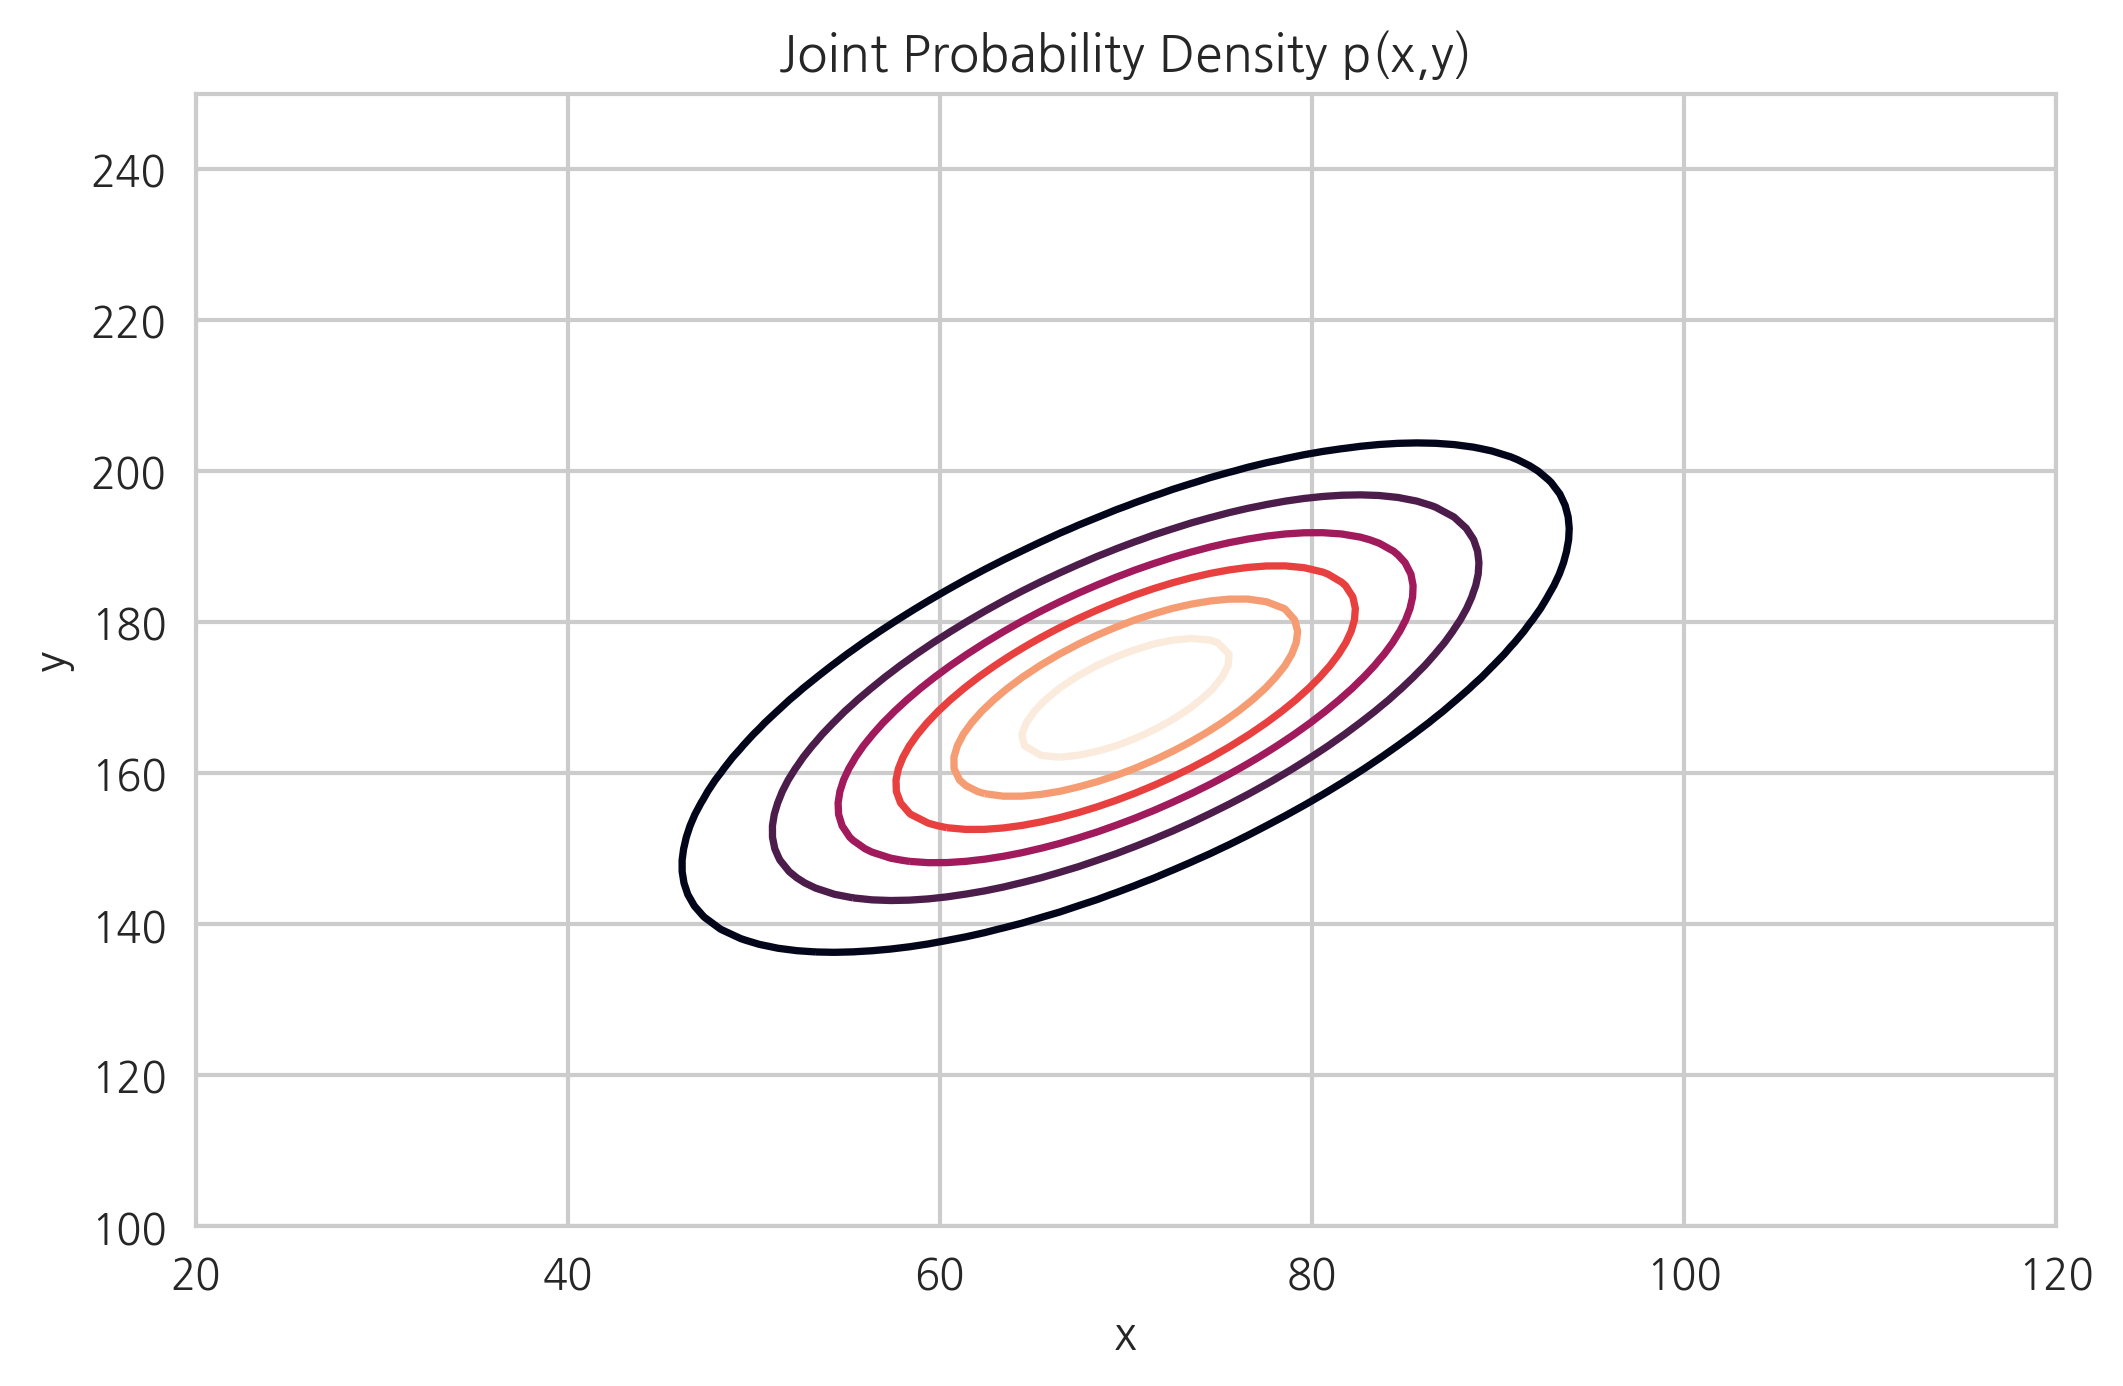

In [44]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density p(x,y)")
plt.show()

동일한 결합 확률 밀도 함수를 3차원으로 그리면 아래와 같다.

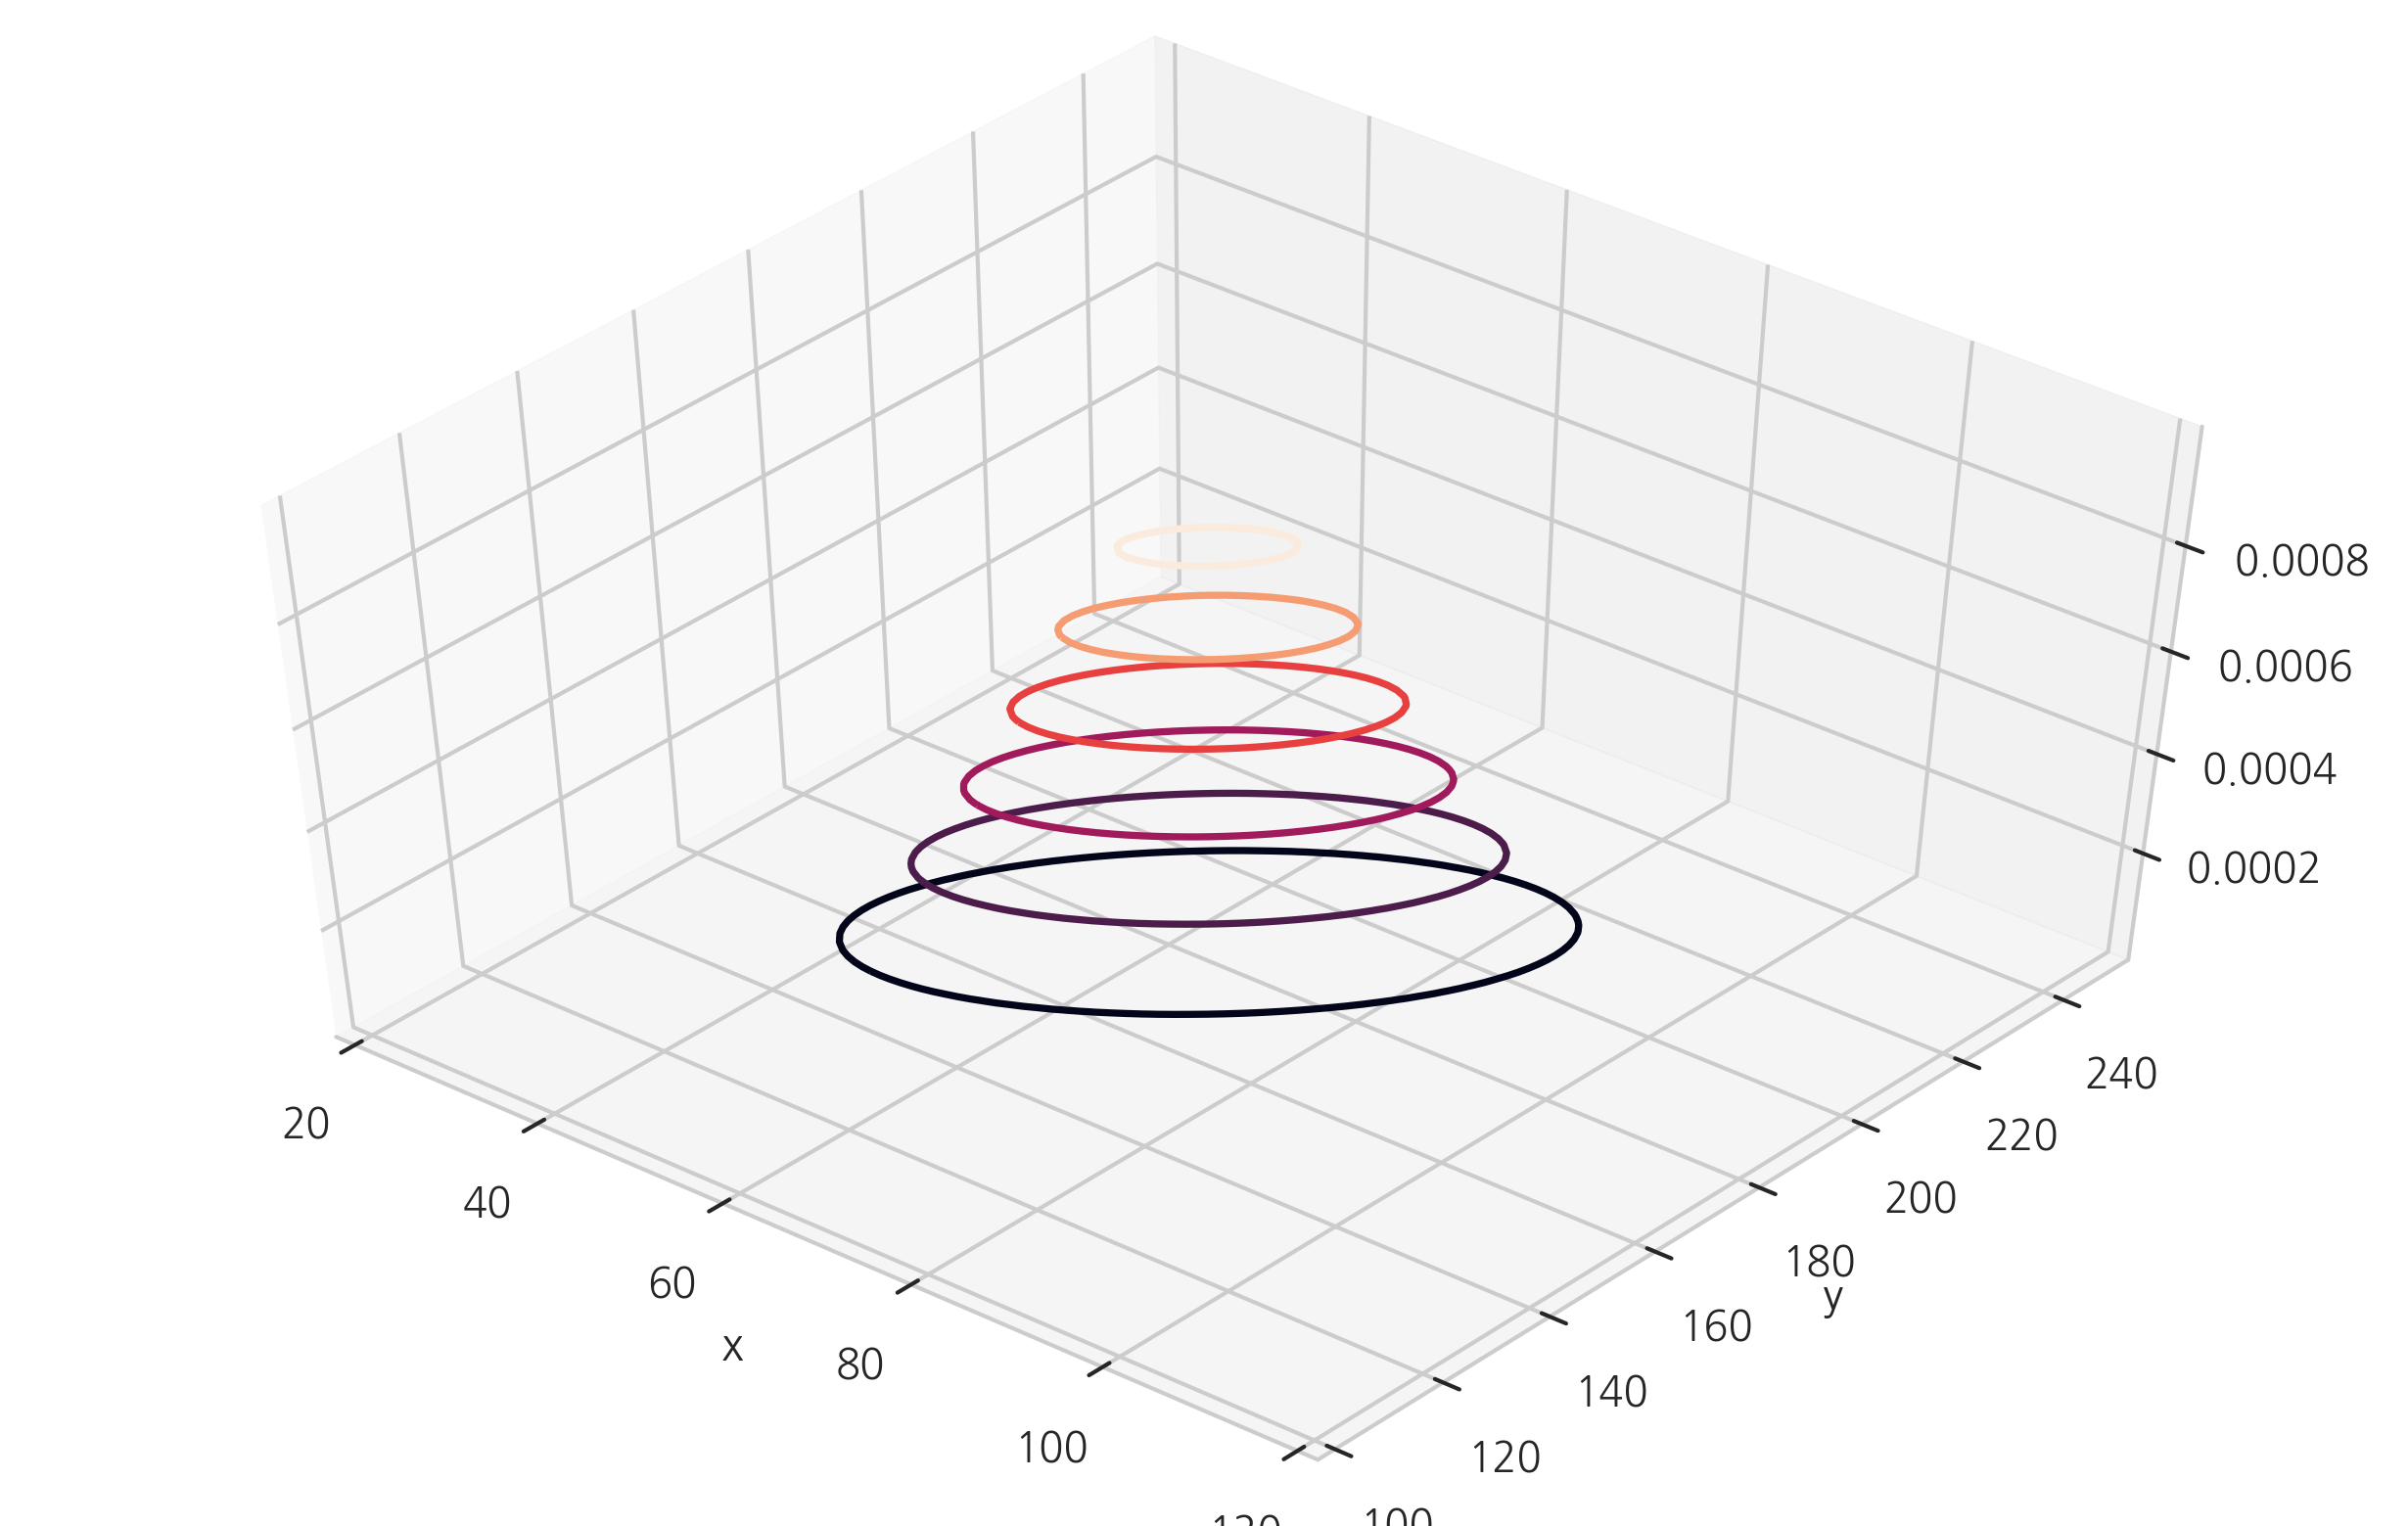

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.view_init(50, -50)
plt.show()

고정된 y값에 대해 확률 밀도 함수의 단면을 표시하면 다음과 같다.

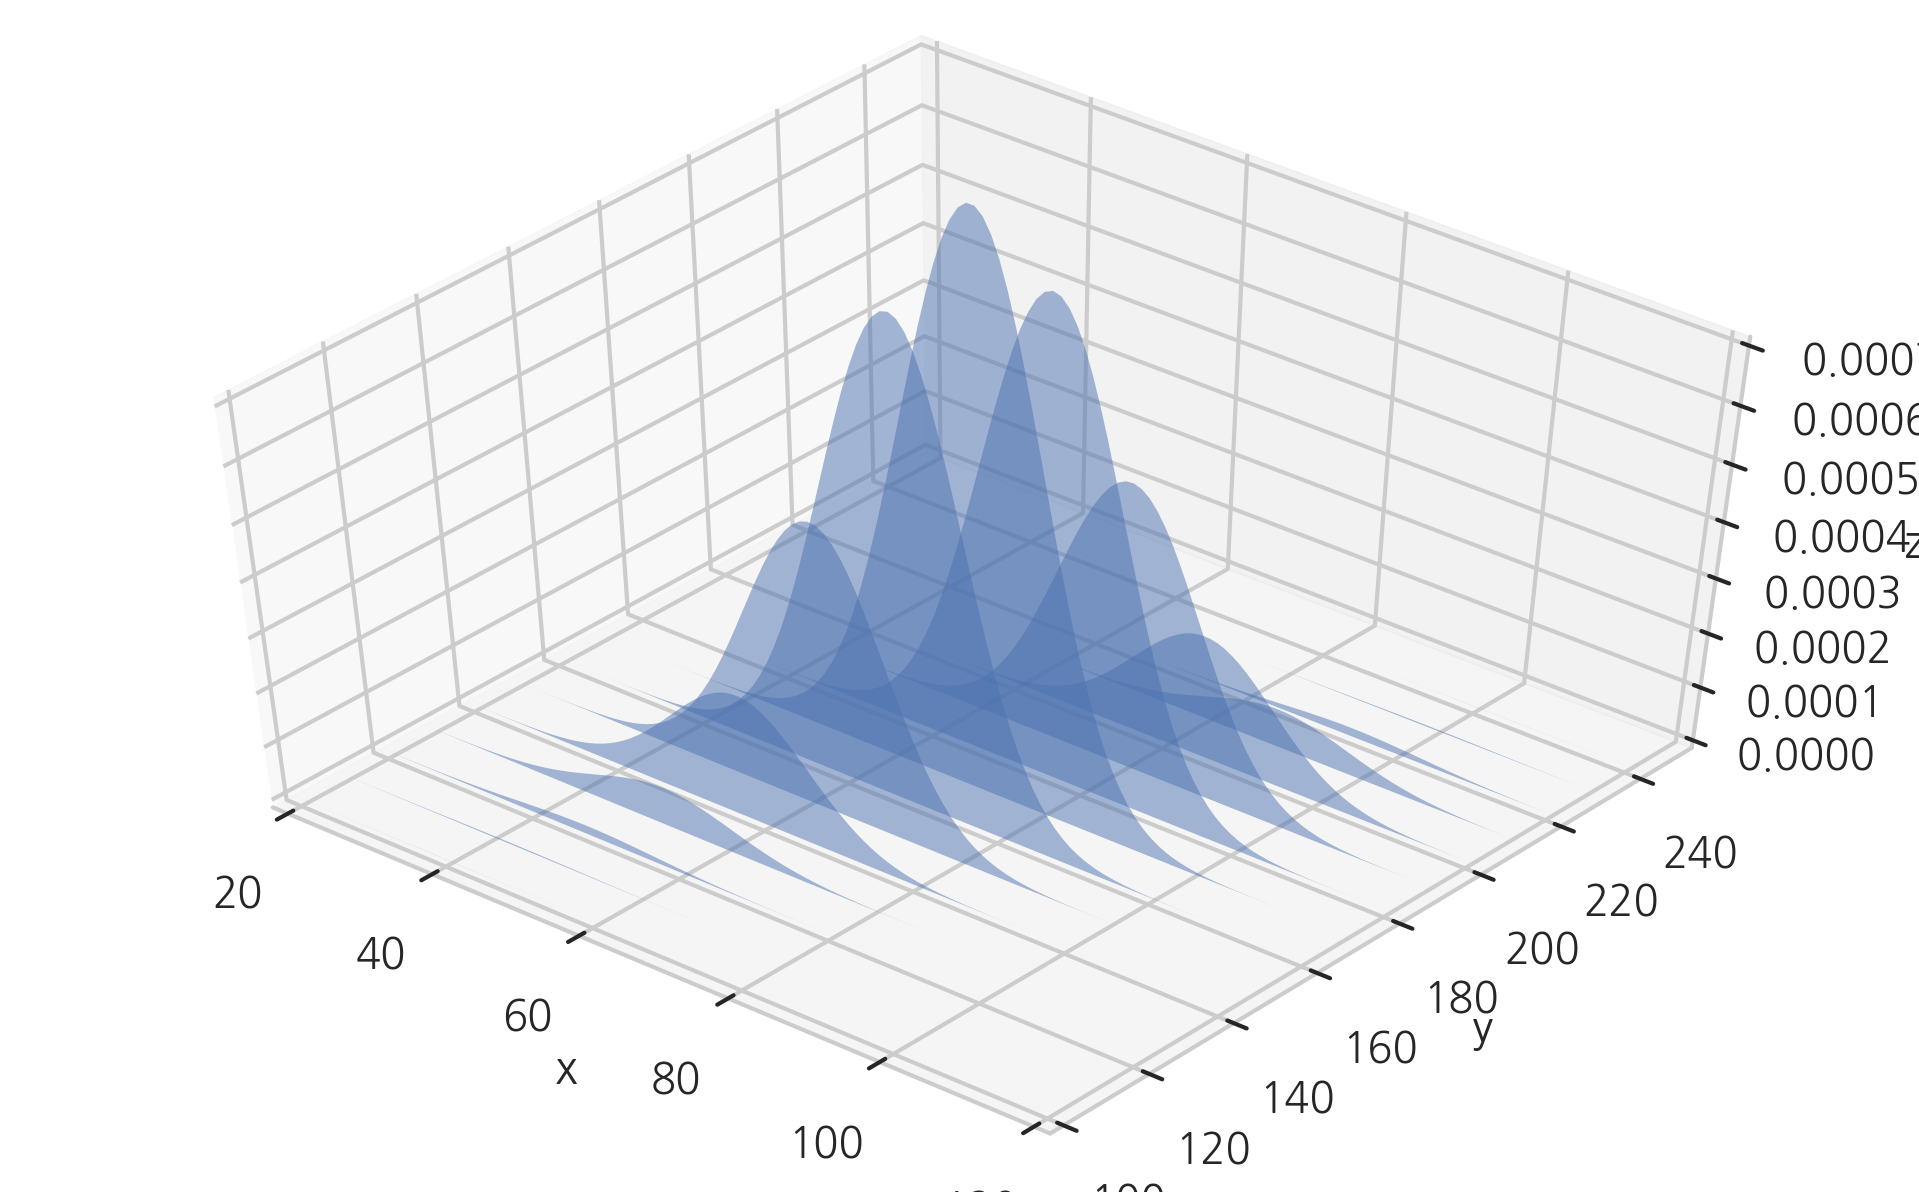

In [53]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.show()

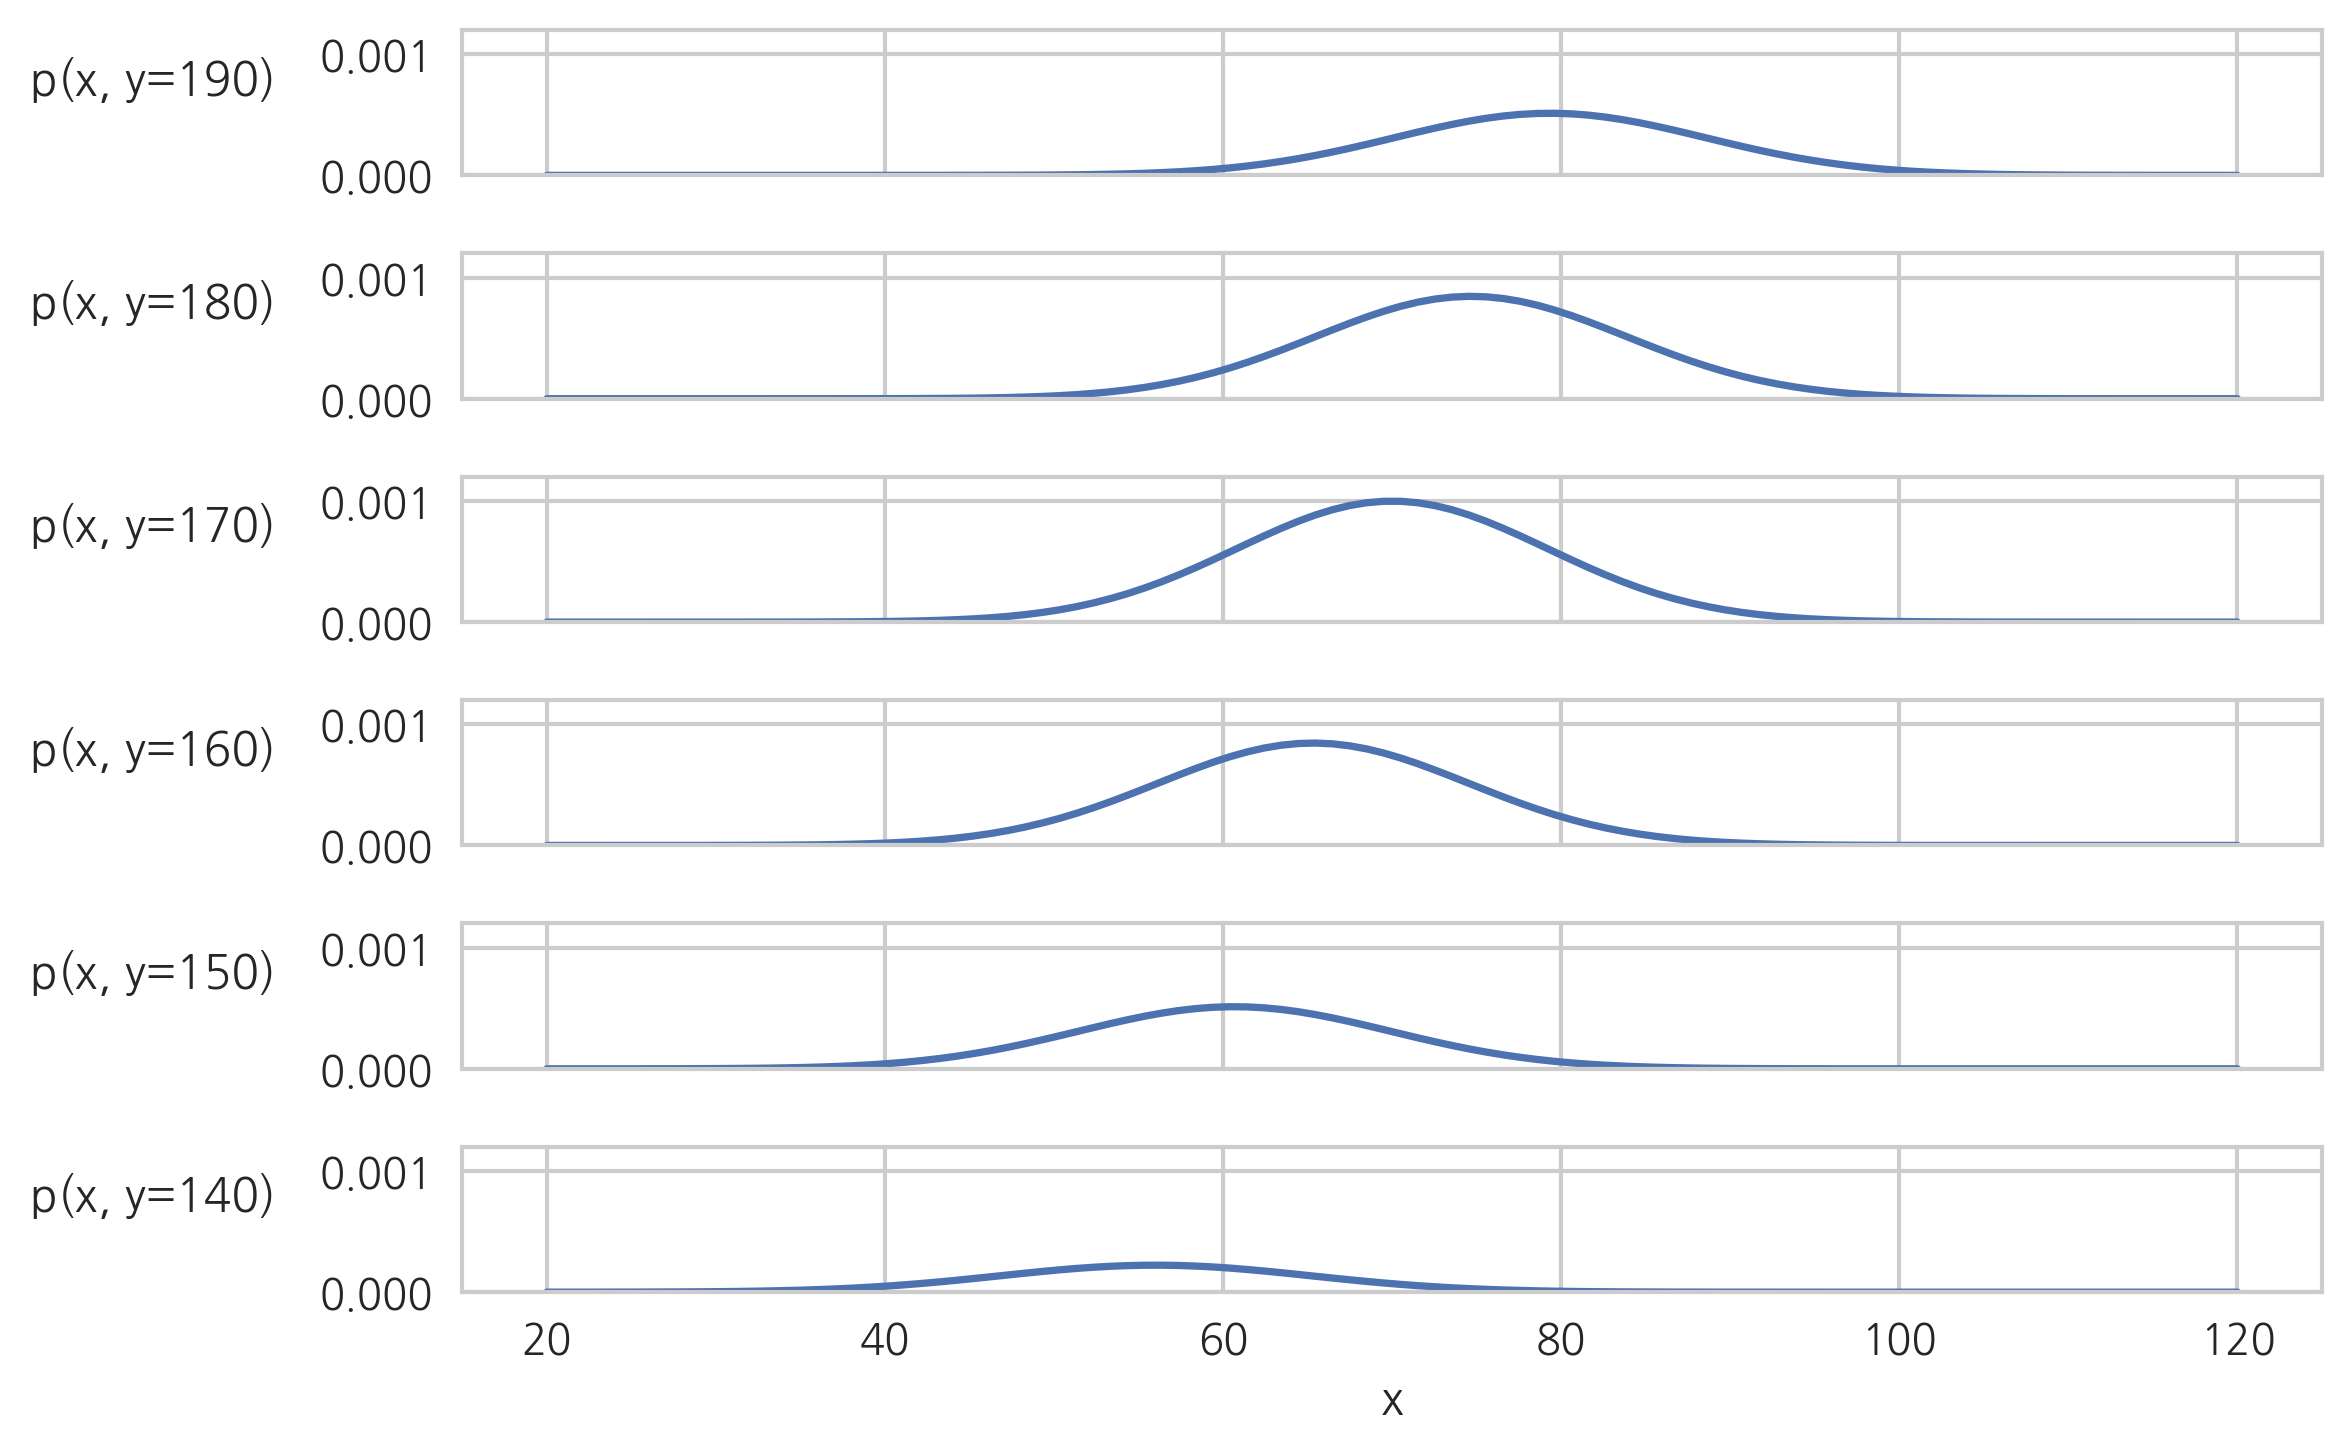

In [54]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.show()

#### 연습 문제 1

1. 확률 변수의 값을 모른다고 할 때 어떤 값이 나올 가능성이 가장 높은가.
1. 만약 확률 변수  Y 의 값이 170이 나왔다면 확률 변수  X 의 값은 어떤 값이 나올 가능성이 가장 높은가.
1. 만약 확률 변수  Y 의 값이 150이 나왔다면 확률 변수  X 의 값은 어떤 값이 나올 가능성이 가장 높은가.

## 주변 확률밀도함수

**주변 확률밀도함수(marginal probability density function)**는 결합 확률밀도함수를 특정한 하나의 변수에 대해 가중평균한 값을 말한다. 따라서 결합 확률밀도함수를 하나의 확률변수에 대해서만 적분하여 구한다. 

가중평균(적분)으로 인해 차원이 한 개 줄어들기 때문에 2차원 확률 변수의 주변 확률 밀도 함수는 1차원 함수가 된다.

$$ 
\begin{align}%\label{}
\nonumber  f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x,y)dy \\
\nonumber  f_Y(y) = \int_{-\infty}^{\infty} f_{XY}(x,y)dx
\end{align} 
$$

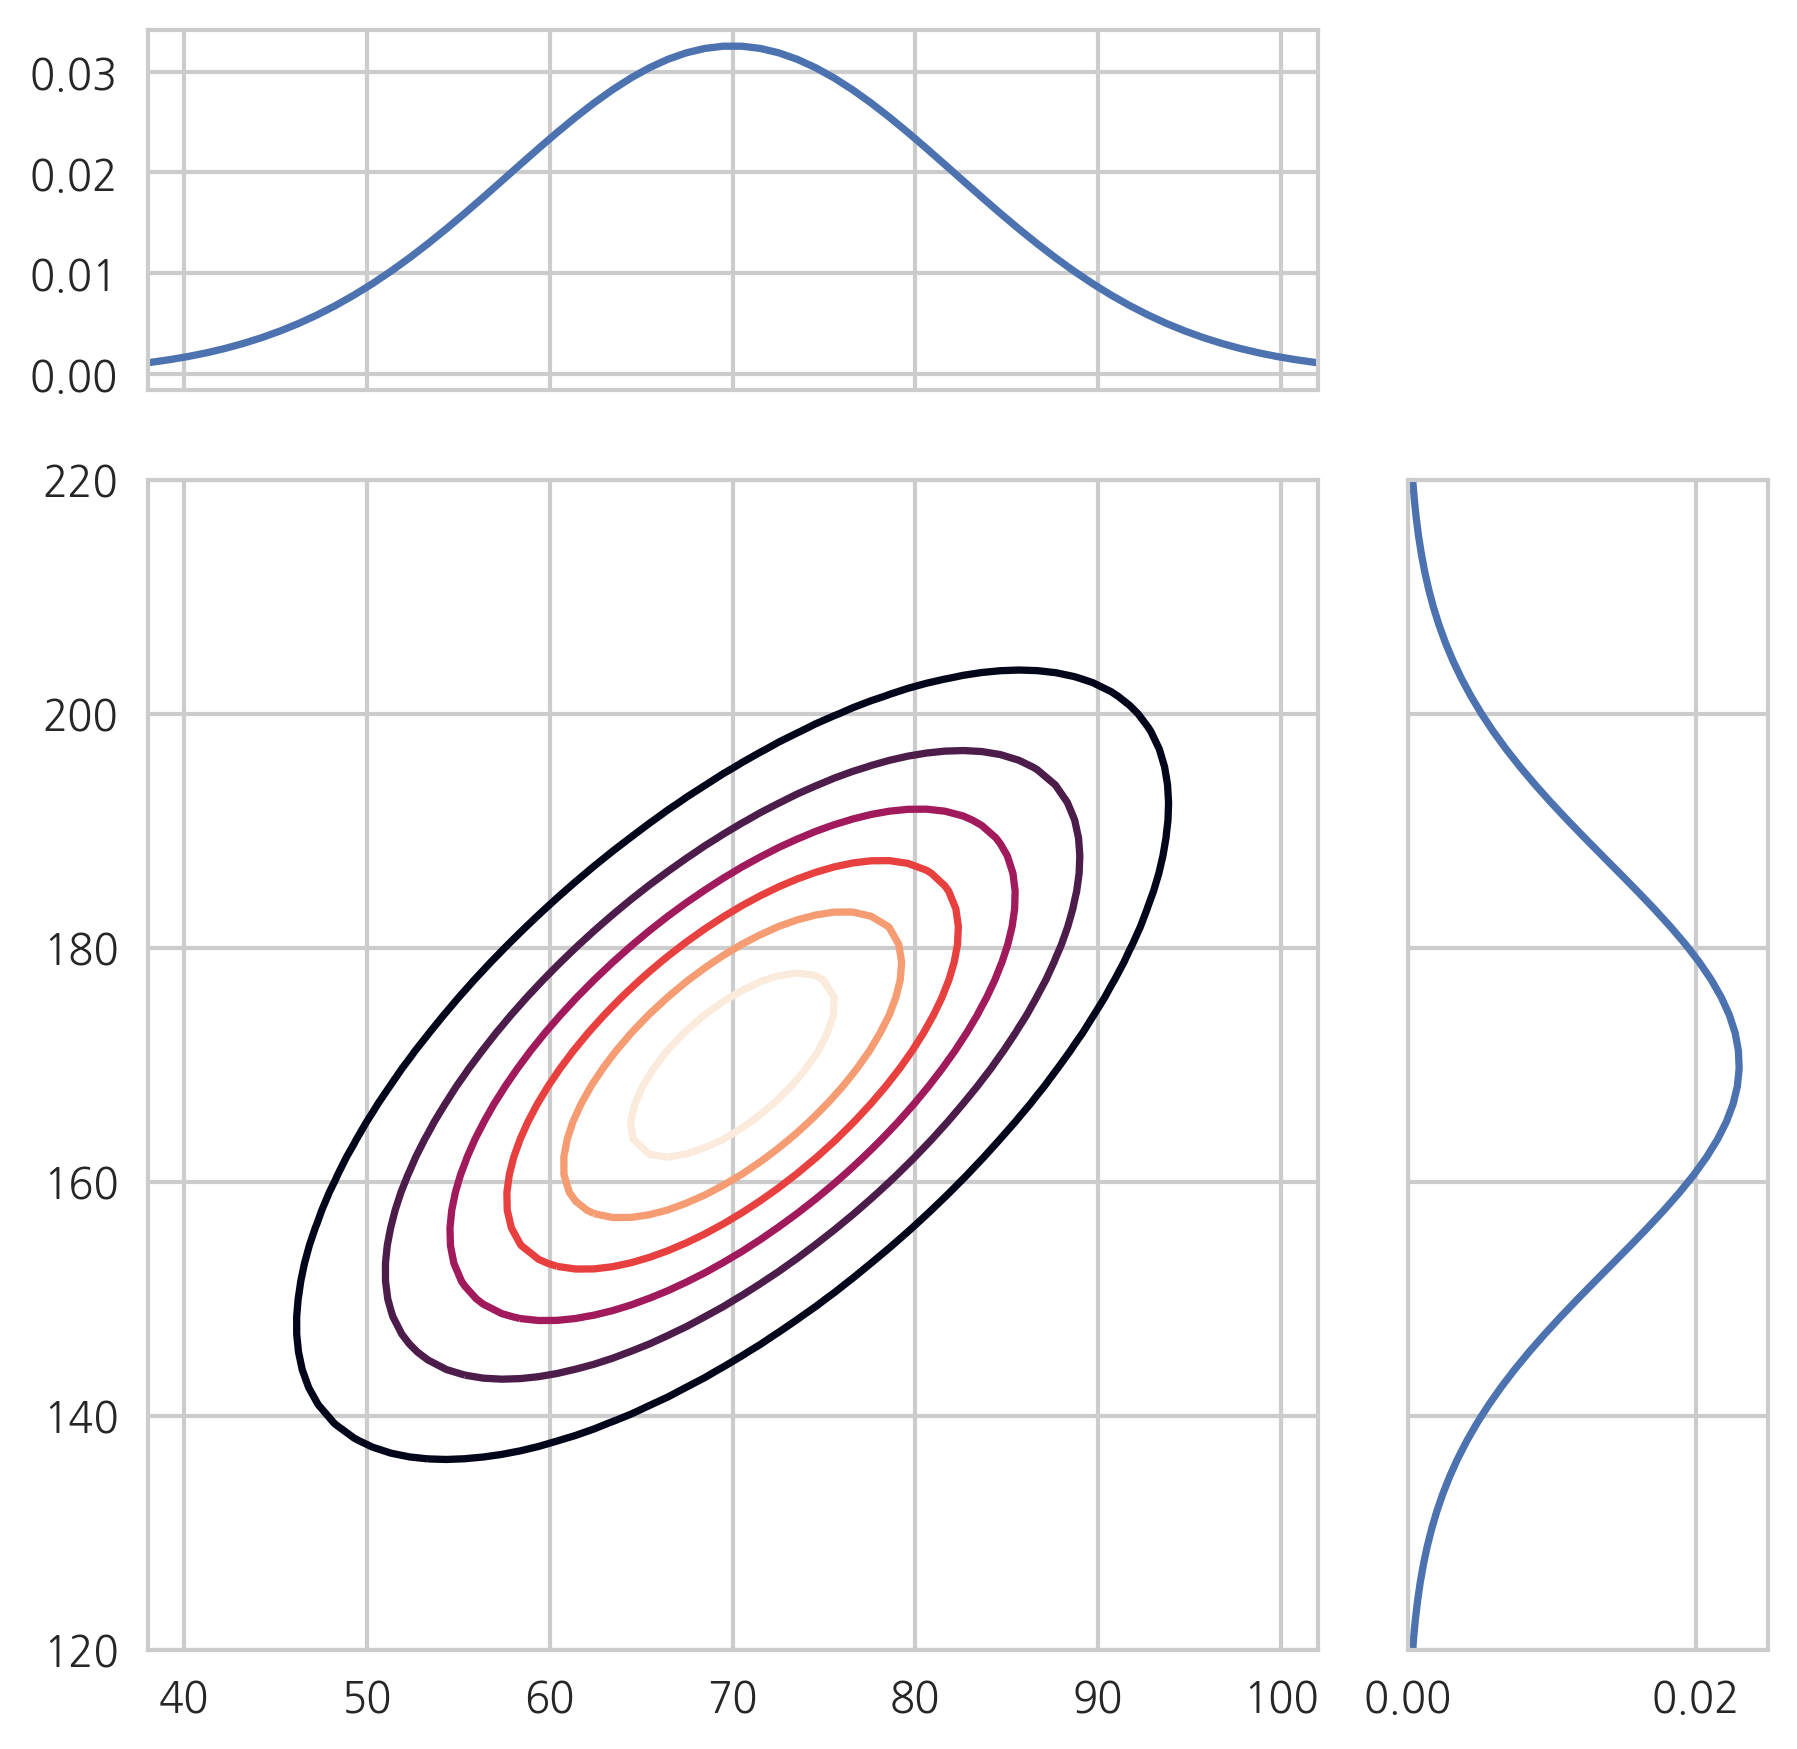

In [89]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax2.plot(xx, fx)
base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)
plt.show()


## 조건부 확률밀도함수

조건부 확률밀도함수(conditional probability density function)는 다변수 확률 변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우, 이러한 조건(가정)에 의해 변화한 나머지 확률변수에 대한 확률밀도함수를 말한다. 

$$ f_{X \mid Y}(x \mid y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)} $$

$$ f_{Y \mid X}(y \mid x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)} $$

조건부 확률밀도함수에서 조건이 되는 확률변수의 값은 특정한 값으로 고정되어 있으므로 변수가 아니라 모수로 생각할 수 있다.
예를 들어 $f_{X \mid Y}(x \mid y)$에서 $y$의 값은 고정되어 있으므로 이 값은 $x$의 함수가 된다.

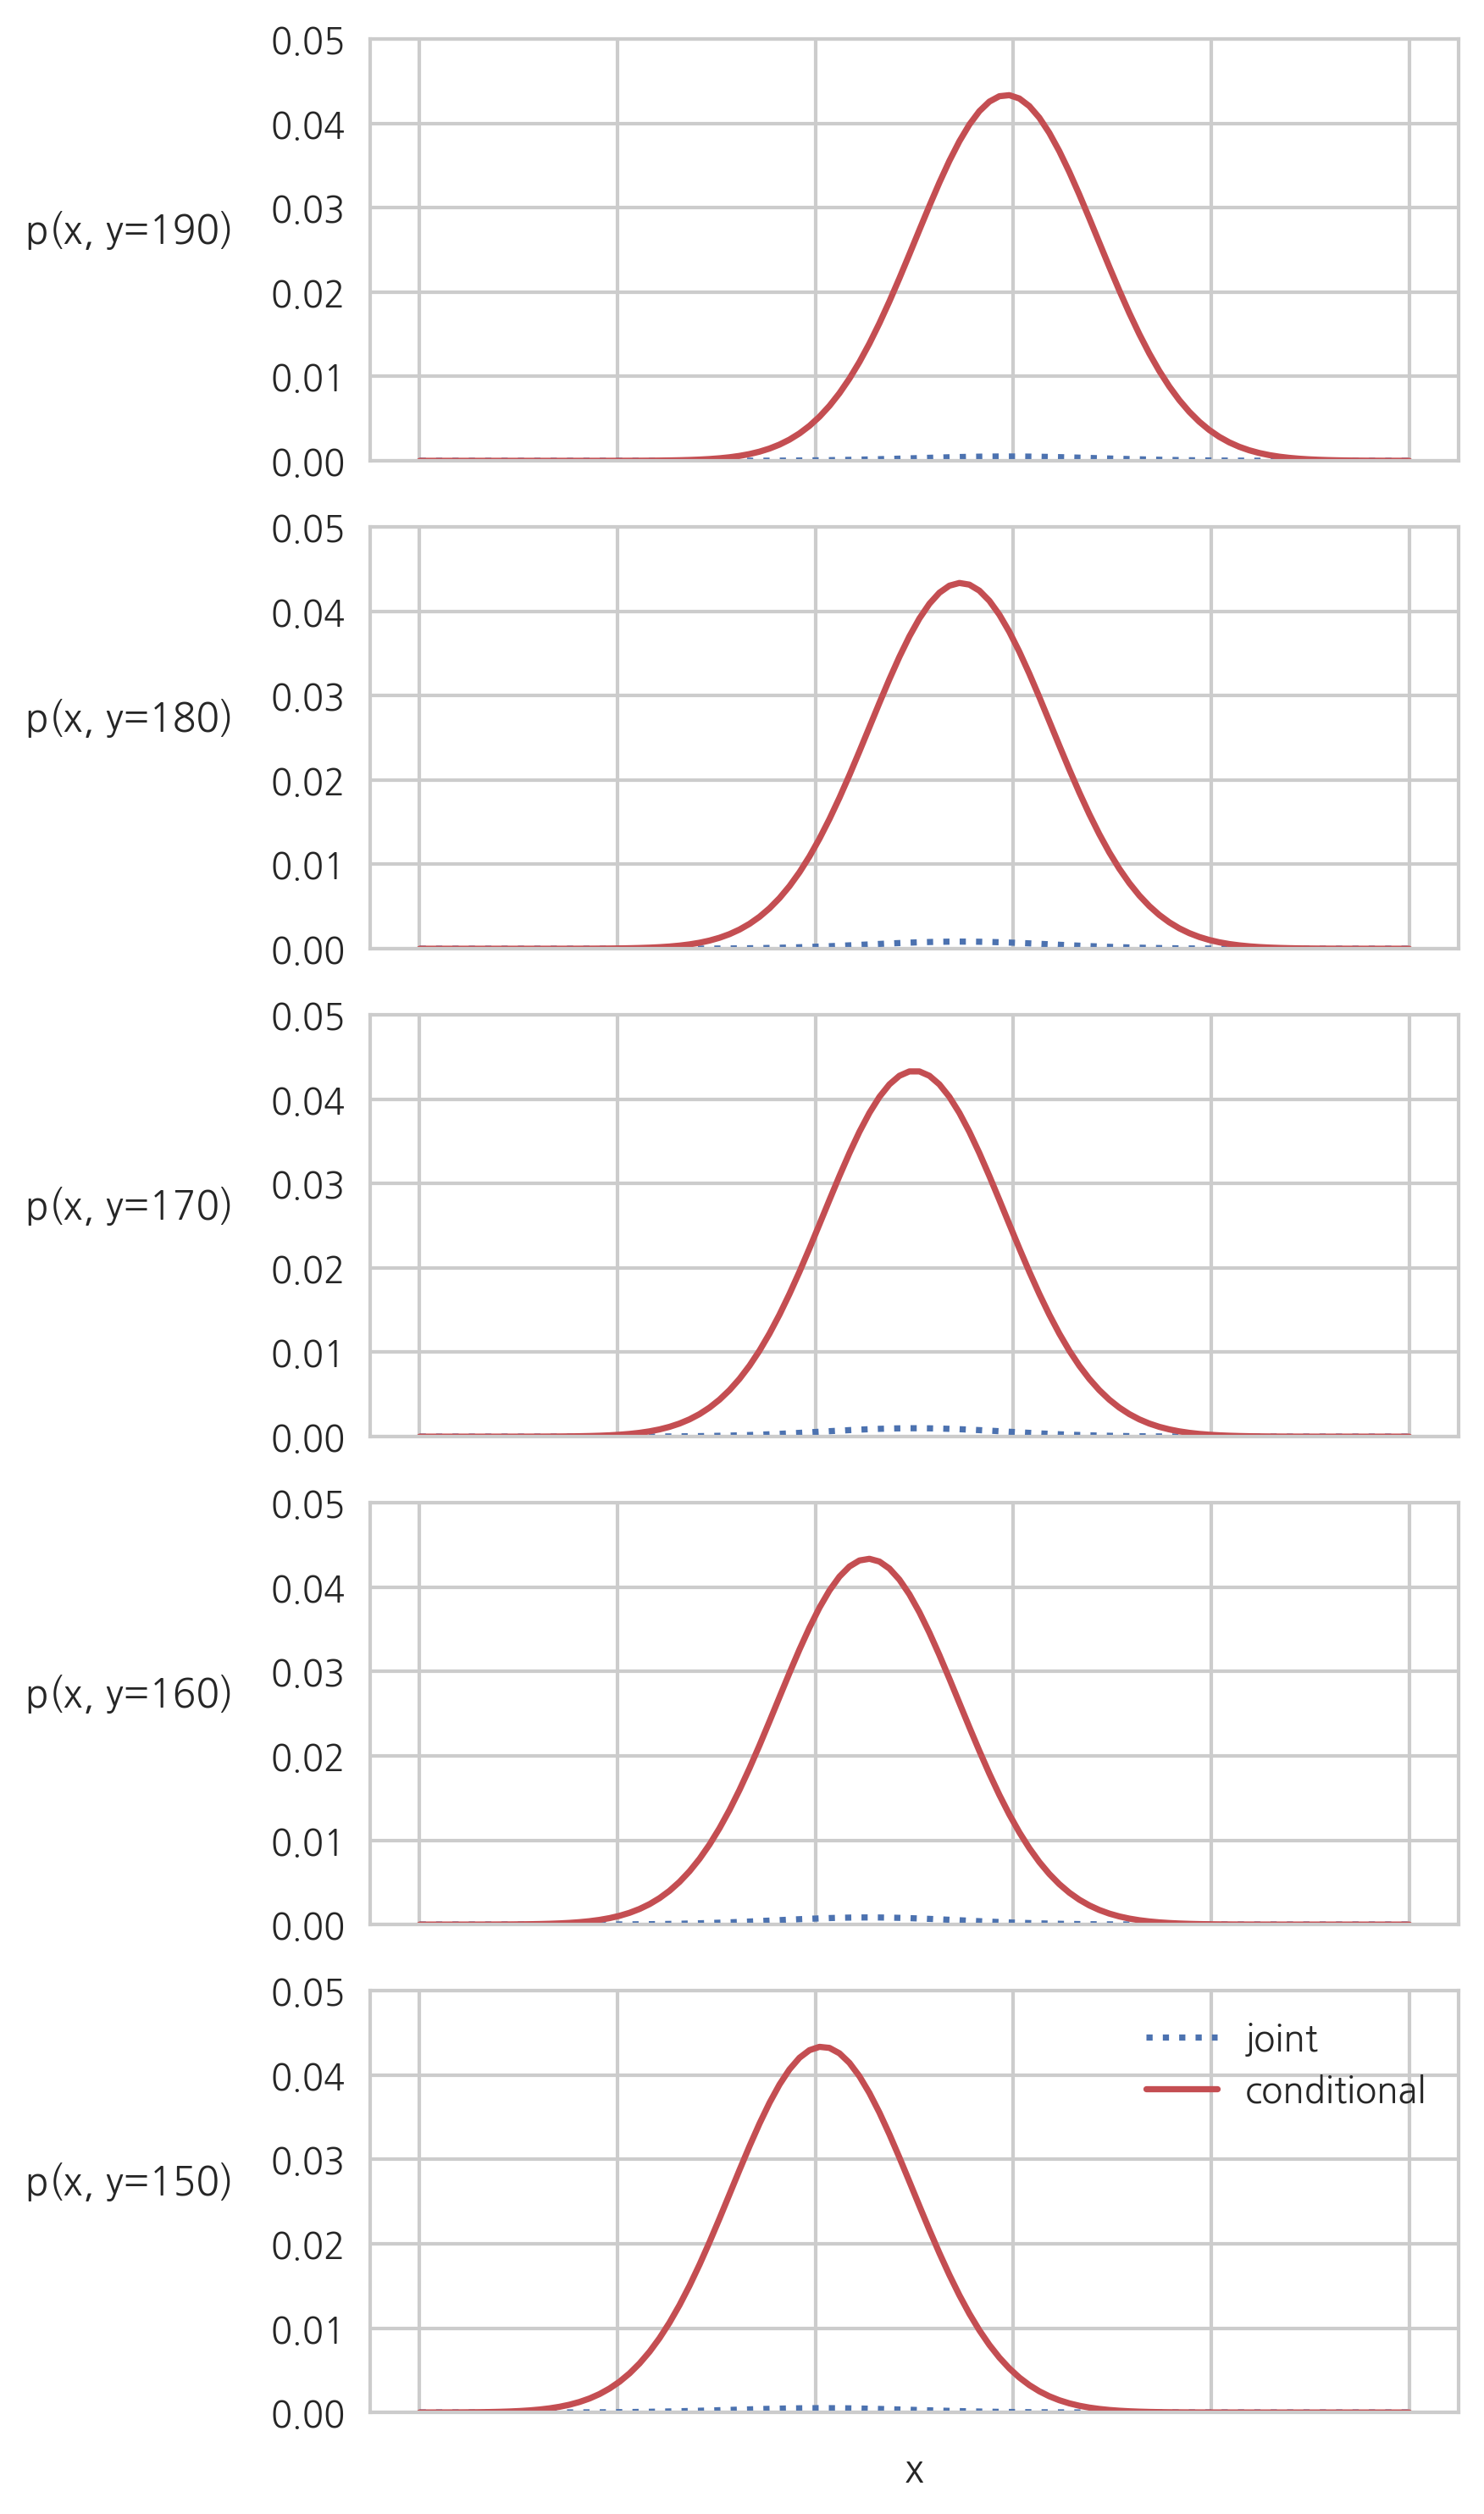

In [103]:
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.figure(figsize=(6,10))

for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :], 'b:', label="joint")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label="conditional")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()